In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.shape  

(31962, 3)

In [5]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [7]:
count3=[]
count3.append(int(df.label.value_counts()[1]))
count3.append(int(df.label.value_counts()[0]))

In [9]:
print(count3)

[2242, 29720]


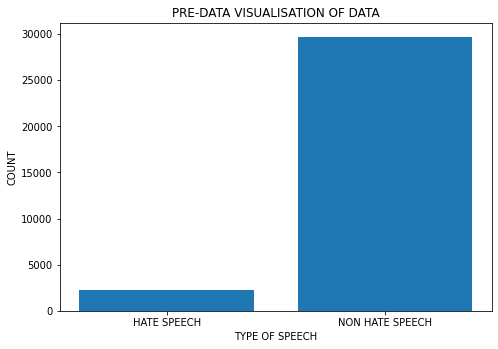

In [11]:
#PRE-DATA VISULAISATION - Graphical representation of data
fig3=plt.figure()
axes=fig3.add_axes([0,0,1,1])
label3=['HATE SPEECH','NON HATE SPEECH']
axes.bar(label3,count3)
plt.xlabel("TYPE OF SPEECH")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()

In [12]:
#DATA PREPROCESSING
#TOKENIZATION OF TEXT
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

In [13]:
preprocess1_3=[]
for each_row in range(df.shape[0]):
    text=df['tweet'].values[each_row]
    ctext=str(text)
    regex=re.sub('[^A-Za-z0-9!?]', ' ', ctext)
    preprocess1_3.append(regex)
df["Preprocessed_1"]=preprocess1_3

In [14]:
df[['Preprocessed_1']]

,Preprocessed_1
0,user when a father is dysfunctional and is s...
1,user user thanks for lyft credit i can t us...
2,bihday your majesty
3,model i love u take with u all the time in ...
4,factsguide society now motivation
...,...
31957,ate user isz that youuu? ...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,user sikh temple vandalised in in calgary ...


In [15]:
preprocess2_3=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_1'].values[each_row]
    ctext_p1=str(text)
    regex_p1=re.sub('[^A-Za-z]', ' ', ctext_p1)
    preprocess2_3.append(regex_p1)
df["Preprocessed_2"]=preprocess2_3

In [16]:
df[['Preprocessed_2']]

,Preprocessed_2
0,user when a father is dysfunctional and is s...
1,user user thanks for lyft credit i can t us...
2,bihday your majesty
3,model i love u take with u all the time in ...
4,factsguide society now motivation
...,...
31957,ate user isz that youuu ...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,user sikh temple vandalised in in calgary ...


In [17]:
preprocess3_3=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_2'].values[each_row]
    ctext_p2=str(text)
    regex_p2=ctext_p2.lower()
    preprocess3_3.append(regex_p2)
df["Preprocessed_3"]=preprocess3_3

In [18]:
df[['Preprocessed_3']]

,Preprocessed_3
0,user when a father is dysfunctional and is s...
1,user user thanks for lyft credit i can t us...
2,bihday your majesty
3,model i love u take with u all the time in ...
4,factsguide society now motivation
...,...
31957,ate user isz that youuu ...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,user sikh temple vandalised in in calgary ...


In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stopwords_list=stopwords.words('english')

In [20]:
preprocess4_3=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_3'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        if not each_word in stopwords_list:
            clean_words.append(each_word)
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess4_3.append(dre)
df['Preprocessed_4']=preprocess4_3

In [21]:
df[['Preprocessed_4']]

,Preprocessed_4
0,user father dysfunctional selfish drags kids d...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
31957,ate user isz youuu
31958,see nina turner airwaves trying wrap mantle ge...
31959,listening sad songs monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


In [22]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

In [23]:
preprocess5_3=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_4'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        clean_words.append(lm.lemmatize(each_word))
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess5_3.append(dre)
df['Preprocessed_5']=preprocess5_3

In [24]:
df[['Preprocessed_5']]

,Preprocessed_5
0,user father dysfunctional selfish drag kid dys...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
31957,ate user isz youuu
31958,see nina turner airwave trying wrap mantle gen...
31959,listening sad song monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


In [25]:
#removing empty rows
df=df[df['Preprocessed_5']!='']

In [26]:
df.shape

(31949, 8)

In [27]:
df[['Preprocessed_5']]

,Preprocessed_5
0,user father dysfunctional selfish drag kid dys...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
31957,ate user isz youuu
31958,see nina turner airwave trying wrap mantle gen...
31959,listening sad song monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


In [28]:
per=list()
df2 = pd.DataFrame()
df2['Clean Tweets']=df['Preprocessed_5']
df2['label']=df['label']

In [29]:
df2

,Clean Tweets,label
0,user father dysfunctional selfish drag kid dys...,0
1,user user thanks lyft credit use cause offer w...,0
2,bihday majesty,0
3,model love u take u time ur,0
4,factsguide society motivation,0
...,...,...
31957,ate user isz youuu,0
31958,see nina turner airwave trying wrap mantle gen...,0
31959,listening sad song monday morning otw work sad,0
31960,user sikh temple vandalised calgary wso condem...,1


In [30]:
#FEATURE EXTRACTION - Mapping from textual data into real valued vectors for making compatible with model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()        #Loading tfidf function to our variable

In [31]:
#Fitting and transforming the vectorizer to our data
x=df2['Clean Tweets']
vectorizer.fit(x)

x=vectorizer.transform(x)   #Transforming all the text data and gives corresponding tf-idf value

In [32]:
print(x)

  (0, 32641)	0.09336564670639415
  (0, 27238)	0.40025792665287996
  (0, 26489)	0.3015793959145715
  (0, 16692)	0.26516952206187433
  (0, 10380)	0.21535943454552325
  (0, 8965)	0.4853272489249047
  (0, 8964)	0.46689974500522735
  (0, 8667)	0.41218180965829077
  (1, 33826)	0.33805875890681814
  (1, 32736)	0.31459259774466863
  (1, 32641)	0.13909793046851743
  (1, 32632)	0.22406059395249503
  (1, 30687)	0.19122188733611725
  (1, 23104)	0.33805875890681814
  (1, 22053)	0.2636727879510458
  (1, 18521)	0.3243319345910815
  (1, 12116)	0.34779809575323106
  (1, 8158)	0.3615249200689677
  (1, 6836)	0.2890740194540391
  (1, 5002)	0.2374968197943635
  (2, 18711)	0.8811678459719198
  (2, 3158)	0.47280358207738543
  (3, 32596)	0.5003660567109992
  (3, 31233)	0.4041968458765561
  (3, 30185)	0.4619132476539622
  :	:
  (31945, 18920)	0.32272626663528153
  (31945, 17698)	0.13208754139127823
  (31945, 14995)	0.27408701427884813
  (31945, 13791)	0.22312190177427593
  (31945, 12045)	0.2639183970855316
  (

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,df2['label'],test_size=0.25,train_size=0.75)

In [35]:
x_train.shape

(23961, 35101)

In [36]:
x_test.shape

(7988, 35101)

In [38]:
y_train.shape

(23961,)

In [39]:
y_test.shape

(7988,)

In [40]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [41]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_pred1=rfc.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [45]:
rf1=accuracy_score(y_pred1,y_test)
rf2=precision_score(y_pred1,y_test,average='weighted')
rf3=recall_score(y_pred1,y_test,average='weighted')
rf4=f1_score(y_pred1,y_test,average='weighted')

In [46]:
print(rf1,rf2,rf3,rf4)

0.9611917876815222 0.9786942271453977 0.9611917876815222 0.9670837244172958


In [47]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression(max_iter=250)

In [48]:
lrc.fit(x_train,y_train)

LogisticRegression(max_iter=250)

In [49]:
y_pred2=lrc.predict(x_test)

In [50]:
lrc1=accuracy_score(y_pred2,y_test)
lrc2=precision_score(y_pred2,y_test)
lrc3=recall_score(y_pred2,y_test)
lrc4=f1_score(y_pred2,y_test)

In [51]:
print(lrc1,lrc2,lrc3,lrc4)

0.9479218828242364 0.27586206896551724 0.8994082840236687 0.4222222222222222


In [52]:
#NAIVEBayes
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [53]:
nb.fit(x_train,y_train)

MultinomialNB()

In [54]:
y_pred3=nb.predict(x_test)

In [55]:
nb1=accuracy_score(y_pred3,y_test)
nb2=precision_score(y_pred3,y_test)
nb3=recall_score(y_pred3,y_test)
nb4=f1_score(y_pred3,y_test)

In [56]:
print(nb1,nb2,nb3,nb4)

0.9412869303955934 0.15063520871143377 0.9880952380952381 0.2614173228346457


In [57]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()

In [58]:
sgd.fit(x_train,y_train)

SGDClassifier()

In [59]:
y_pred4=sgd.predict(x_test)

In [60]:
sgd1=accuracy_score(y_pred4,y_test)
sgd2=precision_score(y_pred4,y_test)
sgd3=recall_score(y_pred4,y_test)
sgd4=f1_score(y_pred4,y_test)

In [61]:
print(sgd1,sgd2,sgd3,sgd4)

0.9530545818728092 0.35390199637023595 0.9112149532710281 0.5098039215686274


In [62]:
from sklearn.svm import SVC
svc=SVC()

Text(0.5, 1.0, 'Representation of measures')

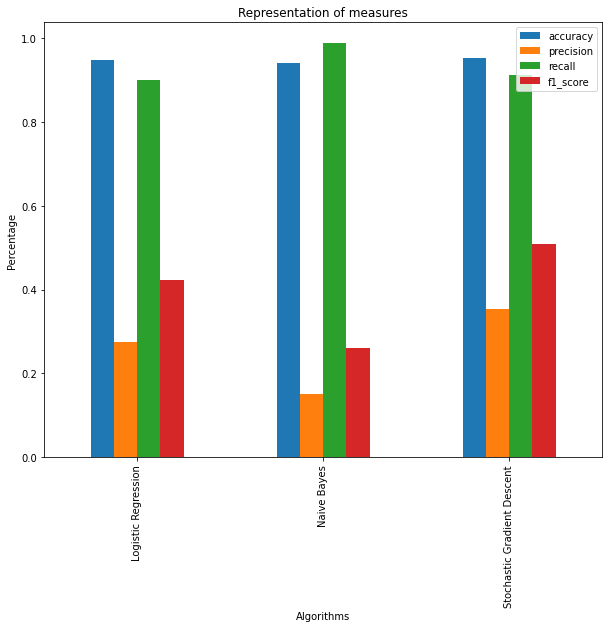

In [65]:
graph=pd.DataFrame({"accuracy":[lrc1,nb1,sgd1],
                    "precision":[lrc2,nb2,sgd2],
                     "recall":[lrc3,nb3,sgd3],
                     "f1_score":[lrc4,nb4,sgd4]},
                  index=["Logistic Regression","Naive Bayes","Stochastic Gradient Descent"])
graph.plot(kind='bar',figsize=(10,8))
plt.xlabel("Algorithms")
plt.ylabel("Percentage")
plt.title("Representation of measures")

In [66]:
from prettytable import PrettyTable

myTable = PrettyTable(["Models", "Accuracy", "Precision", "Recall","F1_Score"])

# Add rows
myTable.add_row(["NB", round(nb1*100,1),round(nb2*100,1),round(nb3*100,1),round(nb4*100,1)])
myTable.add_row(["LR", round(lrc1*100,1),round(lrc2*100,1),round(lrc3*100,1),round(lrc4*100,1)])
myTable.add_row(["SGD", round(sgd1*100,1),round(sgd2*100,1),round(sgd3*100,1),round(sgd4*100,1)])


print(myTable)

+--------+----------+-----------+--------+----------+
| Models | Accuracy | Precision | Recall | F1_Score |
+--------+----------+-----------+--------+----------+
|   NB   |   94.1   |    15.1   |  98.8  |   26.1   |
|   LR   |   94.8   |    27.6   |  89.9  |   42.2   |
|  SGD   |   95.3   |    35.4   |  91.1  |   51.0   |
+--------+----------+-----------+--------+----------+
